# Assignment 2

## Data import

In [1]:
import pandas as pd
import numpy as np


In [2]:
data_offers=pd.read_csv('./datasets/data_offers.csv')
data_orders=pd.read_csv('./datasets/data_orders.csv')

In [3]:
data_offers

order_gk      offer_id
0       3000579625629  300050936206
1       3000627306450  300052064651
2       3000632920686  300052408812
3       3000632771725  300052393030
4       3000583467642  300051001196
...               ...           ...
334358  3000552921666  300050611632
334359  3000593796526  300051443024
334360  3000590955748  300051340498
334361  3000557510943  300050772593
334362  3000630405861  300052291934

[334363 rows x 2 columns]

In [4]:
data_orders

order_datetime  origin_longitude  origin_latitude  m_order_eta  \
0           18:08:07         -0.978916        51.456173         60.0   
1           20:57:32         -0.950385        51.456843          NaN   
2           12:07:50         -0.969520        51.455544        477.0   
3           13:50:20         -1.054671        51.460544        658.0   
4           21:24:45         -0.967605        51.458236          NaN   
...              ...               ...              ...          ...   
10711       13:11:35         -0.975372        51.457846          NaN   
10712       13:13:55         -0.975372        51.457846          NaN   
10713       13:17:21         -0.972926        51.457693         60.0   
10714       13:16:28         -0.975372        51.457846          NaN   
10715       11:49:35         -0.974738        51.458180        177.0   

            order_gk  order_status_key  is_driver_assigned_key  \
0      3000583041974                 4                       1   
1      3000583116437                 4                       0   
2      3000582891479                 4                       1   
3      3000582941169                 4                       1   
4      3000583140877                 9                       0   
...              ...               ...                     ...   
10711  3000599186906                 4                       0   
10712  3000599186962                 4                       0   
10713  3000599187034                 4                       1   
10714  3000599187024                 4                       0   
10715  3000592871241                 4                       1   

       cancellations_time_in_seconds  
0                              198.0  
1                              128.0  
2                               46.0  
3                               62.0  
4                                NaN  
...                              ...  
10711                           36.0  
10712                            4.0  
10713                           34.0  
10714                            6.0  
10715                           40.0  

[10716 rows x 8 columns]

In [5]:
data_orders.dtypes

order_datetime                    object
origin_longitude                 float64
origin_latitude                  float64
m_order_eta                      float64
order_gk                           int64
order_status_key                   int64
is_driver_assigned_key             int64
cancellations_time_in_seconds    float64
dtype: object

## Task 1

In [6]:
condition1=(data_orders['order_status_key']==4) & (data_orders['is_driver_assigned_key']==0)
condition2=(data_orders['order_status_key']==4) & (data_orders['is_driver_assigned_key']==1)
condition3=(data_orders['order_status_key']==9) & (data_orders['is_driver_assigned_key']==0)
condition4=(data_orders['order_status_key']==9) & (data_orders['is_driver_assigned_key']==1)
conditions=[condition1,condition2,condition3,condition4]
data_orders['cancel_cate'] = np.select(conditions, [1,2,3,4])

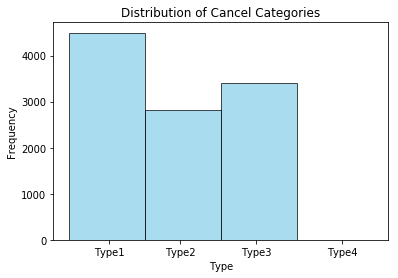

In [8]:
import matplotlib.pyplot as plt


# Plot histogram
plt.hist(data_orders['cancel_cate'], bins=4, color='skyblue', edgecolor='black', alpha=0.7, label='Cancel Category')

# Labeling axes
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.title('Distribution of Cancel Categories')

# Set x-axis ticks and labels
plt.xticks([1.4,2.1,2.85,3.7], ['Type1', 'Type2', 'Type3', 'Type4'])

# custom_labels = {'Type1:xxx': 'xxx'}
# plt.legend(labels=custom_labels, title='Legend', loc='upper right', fontsize='small', shadow=True)

# Display plot
plt.show()


Type 1: cancelled by client without a driver assigned;  
Type 2: cancelled by client with a driver assigned;  
Type 3: cancelled by system without a driver assigned;  
Type 4: cancelled by system with a driver assigned;  
Type 1 has the highest number of orders.


## Task 2

In [9]:
time_split = data_orders['order_datetime'].str.split(':')
#print(time_split)
data_orders['hour'] = time_split.str[0].astype(int)
data_orders[:20]

order_datetime  origin_longitude  origin_latitude  m_order_eta  \
0        18:08:07         -0.978916        51.456173         60.0   
1        20:57:32         -0.950385        51.456843          NaN   
2        12:07:50         -0.969520        51.455544        477.0   
3        13:50:20         -1.054671        51.460544        658.0   
4        21:24:45         -0.967605        51.458236          NaN   
5        21:21:23         -0.947011        51.456380          NaN   
6        07:58:15         -0.955637        51.470372          NaN   
7        07:53:46         -0.978230        51.454575          NaN   
8        08:53:01         -1.052298        51.454308          NaN   
9        06:33:52         -0.976216        51.433202          NaN   
10       15:40:15         -0.934670        51.447065          NaN   
11       20:59:35         -0.972735        51.452489          NaN   
12       06:25:31         -0.958791        51.459481          NaN   
13       16:55:28         -0.950683        51.451368        538.0   
14       00:59:26         -0.937006        51.448696        179.0   
15       00:04:16         -0.974519        51.454603          NaN   
16       08:49:32         -1.011756        51.456498          NaN   
17       08:18:52         -0.940321        51.421571          NaN   
18       08:24:56         -0.966304        51.448351          NaN   
19       08:49:02         -0.963172        51.454195          NaN   

         order_gk  order_status_key  is_driver_assigned_key  \
0   3000583041974                 4                       1   
1   3000583116437                 4                       0   
2   3000582891479                 4                       1   
3   3000582941169                 4                       1   
4   3000583140877                 9                       0   
5   3000583117054                 9                       0   
6   3000582791789                 9                       0   
7   3000582791562                 9                       0   
8   3000582817606                 9                       0   
9   3000582765616                 4                       0   
10  3000582991062                 4                       0   
11  3000583116472                 4                       0   
12  3000582765488                 4                       0   
13  3000583016613                 4                       1   
14  3000582566041                 4                       1   
15  3000582541301                 9                       0   
16  3000582817413                 9                       0   
17  3000582792866                 4                       0   
18  3000582815594                 4                       0   
19  3000582817399                 9                       0   

    cancellations_time_in_seconds  cancel_cate  hour  
0                           198.0            2    18  
1                           128.0            1    20  
2                            46.0            2    12  
3                            62.0            2    13  
4                             NaN            3    21  
5                             NaN            3    21  
6                             NaN            3     7  
7                             NaN            3     7  
8                             NaN            3     8  
9                            78.0            1     6  
10                          167.0            1    15  
11                           45.0            1    20  
12                           79.0            1     6  
13                          188.0            2    16  
14                          316.0            2     0  
15                            NaN            3     0  
16                            NaN            3     8  
17                          183.0            1     8  
18                          120.0            1     8  
19                            NaN            3     8

Plot the distribution of failed orders by hours:

cancel_cate    1    2    3  4
hour                         
0            298  120  263  2
1            219   88  164  0
2            237   78  240  0
3            224   64  225  0
4             50   41   61  0
5             15   25   27  0
6             67   47   45  0
7            164  156  127  0
8            413  314  355  0
9            148  156  108  0
10            51   79   40  0
11            55  111   27  0
12           106   99   51  0
13           148  120   98  0
14           106   97   53  0
15           172  143  124  0
16           143  131   81  1
17           227  167  147  0
18           158  134  122  0
19           113  120   84  0
20           230  114  125  0
21           448  102  296  0
22           326  149  241  0
23           378  156  302  0


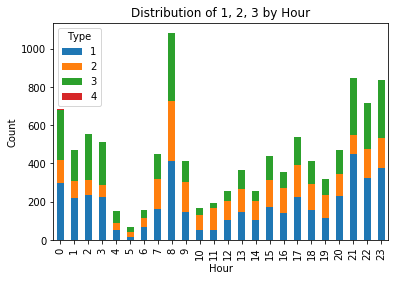

In [10]:

hourly_distribution = data_orders.groupby('hour')['cancel_cate'].value_counts().unstack(fill_value=0)
print(hourly_distribution)

hourly_distribution.plot(kind='bar', stacked=True)
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Distribution of Type 1, 2, 3, 4 by Hour')
plt.legend(title='Type')
plt.show()

Type 1: cancelled by client without a driver assigned;  
Type 2: cancelled by client with a driver assigned;  
Type 3: cancelled by system without a driver assigned;  
Type 4: cancelled by system with a driver assigned;  
**The 8th hour is the biggest fail.**  
**Explanation:** 8 a.m is the rush hour(morning peak), too many orders cause insufficient supply.

Then plot the proportion of cancel type by hour:

d:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
d:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
d:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


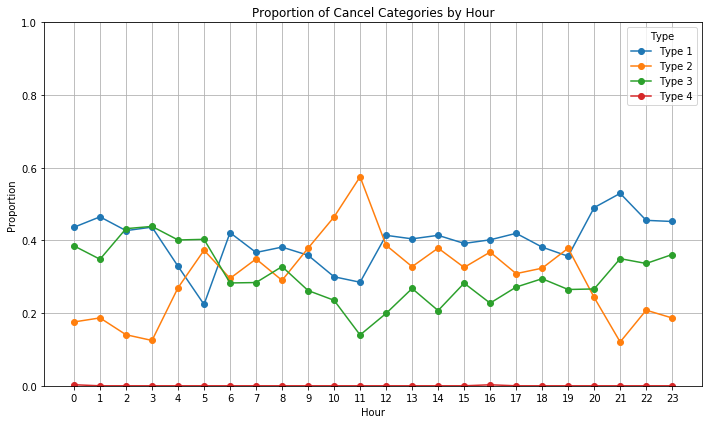

In [34]:
# Calculate proportions
hourly_proportions = hourly_distribution.div(hourly_distribution.sum(axis=1), axis=0)

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each cancel_cate
for cancel_cate in hourly_proportions.columns:
    ax.plot(hourly_proportions.index, hourly_proportions[cancel_cate], marker='o', label=f'Cancel Category {cancel_cate}')

# Set labels and title
ax.set_xlabel('Hour')
ax.set_ylabel('Proportion')
ax.set_title('Proportion of Cancel Categories by Hour')
ax.set_ylim(0, 1)
ax.set_xticks(range(24))
ax.grid(True)

# Add legend
ax.legend(title='Type',labels=['Type 1', 'Type 2', 'Type 3', 'Type 4'])

# Show plot
plt.tight_layout()
plt.show()

Type 1: cancelled by client without a driver assigned;  
Type 2: cancelled by client with a driver assigned;  
Type 3: cancelled by system without a driver assigned;  
Type 4: cancelled by system with a driver assigned;  
  
**The proportion of type 2 is abnoramlly high at the 10th and 11th hour.**  
**Explanation:** At the 10th and 11th hour, the propotion of type 1 and type 2 are relatively low, which means the propotion of "without a driver assigned" is relatively low because most drivers are working at 10-11 a.m.\
  
**The proportion of type 1 is abnoramlly high at the 20th and 21th hour.**  
**Explanation**: At the 20th and 21th hour, the number of type 2 declines, because the demand at this time is large, most clients would not cancel if a driver is assigned.

## Task 3

Check the distribution of cancellations time in seconds:

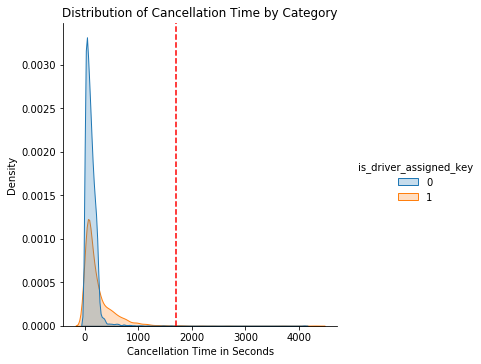

In [13]:
#Check the distribution
import seaborn as sns
sns.displot(data=data_orders, x='cancellations_time_in_seconds', hue='is_driver_assigned_key', kind='kde', fill=True, legend=True)
plt.axvline(x=1700, color='red', linestyle='--', label='Threshold')

plt.xlabel('Cancellation Time in Seconds')
plt.ylabel('Density')
plt.title('Distribution of Cancellation Time by Category')
plt.show()

Check 'cancellations_time_in_seconds' which is larger than 1700:

In [14]:
outliers = data_orders[data_orders['cancellations_time_in_seconds'] > 1700]
outliers['cancellations_time_in_seconds']

587      1710.0
3442     4097.0
3443     1885.0
3480     1785.0
3505     1873.0
3956     2190.0
5790     2155.0
6825     2680.0
8369     4303.0
8473     3697.0
9362     1769.0
9924     2376.0
10168    1744.0
10310    1774.0
Name: cancellations_time_in_seconds, dtype: float64

Therefore, we consider the cancellation time which is larger than 1700 the outlier.  
Remove outliers and plot:

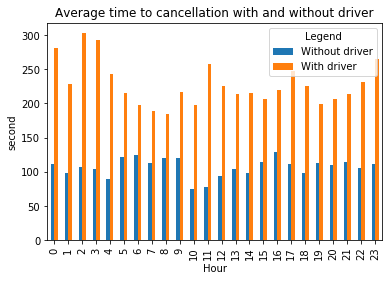

In [15]:
filtered_data_orders = data_orders[data_orders['cancellations_time_in_seconds'] <= 1700]

grouped = filtered_data_orders.groupby(['hour', 'is_driver_assigned_key'])['cancellations_time_in_seconds'].mean().unstack()

grouped.plot(kind='bar', stacked=False)
plt.xlabel('Hour')
plt.ylabel('second')
plt.title('Average time to cancellation with and without driver')
plt.legend(title='Legend',labels=['Without driver', 'With driver'],loc='upper right')
plt.show()


**Conclusion:**
1. Average time to cancellation with driver is always lower than that without driver. Because when people have real expectations, they are more likely to wait.
2. At 7-8 a.m., 2-3 p.m., 7-8 p.m., the average time to cancellation with driver is relatively lower, because there are too many orders at these time, peaple are more patient to wait.
3. At 10-11 a.m., the average time to cancellation without driver is relatively lower, because more drivers are working at this time, people know it won't cause too much time finding a new driver closer to them.

## Task 4

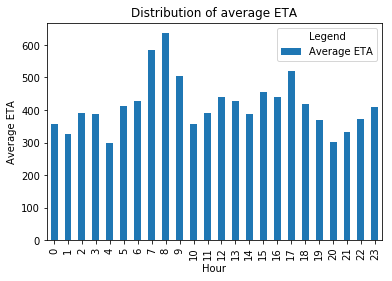

In [17]:
eta_distribution = data_orders.groupby('hour')['m_order_eta'].mean()
eta_distribution.plot(kind='bar', stacked=True)
plt.xlabel('Hour')
plt.ylabel('Average ETA')
plt.title('Distribution of average ETA')
plt.legend(title='Legend',labels=['Average ETA'])
plt.show()

**Explanation:**
At 7-9 a.m., 4-6 p.m., the average ETA is relatively higher because of the morning peak and the evening peak.

## Task 5

In [19]:
import folium
from h3 import h3

# Assuming you have a DataFrame named 'data' containing latitude and longitude columns

# Convert latitude and longitude to hexagon IDs
def get_hex_id(row):
    return h3.geo_to_h3(row['origin_latitude'], row['origin_longitude'], 8)  # Using resolution 8

data_orders['hex_id'] = data_orders.apply(get_hex_id, axis=1)


data_orders

order_datetime  origin_longitude  origin_latitude  m_order_eta  \
0           18:08:07         -0.978916        51.456173         60.0   
1           20:57:32         -0.950385        51.456843          NaN   
2           12:07:50         -0.969520        51.455544        477.0   
3           13:50:20         -1.054671        51.460544        658.0   
4           21:24:45         -0.967605        51.458236          NaN   
...              ...               ...              ...          ...   
10711       13:11:35         -0.975372        51.457846          NaN   
10712       13:13:55         -0.975372        51.457846          NaN   
10713       13:17:21         -0.972926        51.457693         60.0   
10714       13:16:28         -0.975372        51.457846          NaN   
10715       11:49:35         -0.974738        51.458180        177.0   

            order_gk  order_status_key  is_driver_assigned_key  \
0      3000583041974                 4                       1   
1      3000583116437                 4                       0   
2      3000582891479                 4                       1   
3      3000582941169                 4                       1   
4      3000583140877                 9                       0   
...              ...               ...                     ...   
10711  3000599186906                 4                       0   
10712  3000599186962                 4                       0   
10713  3000599187034                 4                       1   
10714  3000599187024                 4                       0   
10715  3000592871241                 4                       1   

       cancellations_time_in_seconds  cancel_cate  hour           hex_id  
0                              198.0            2    18  88195d2b03fffff  
1                              128.0            1    20  88195d2b19fffff  
2                               46.0            2    12  88195d2b1dfffff  
3                               62.0            2    13  88195d7497fffff  
4                                NaN            3    21  88195d2b1dfffff  
...                              ...          ...   ...              ...  
10711                           36.0            1    13  88195d2b03fffff  
10712                            4.0            1    13  88195d2b03fffff  
10713                           34.0            2    13  88195d2b1dfffff  
10714                            6.0            1    13  88195d2b03fffff  
10715                           40.0            2    11  88195d2b1dfffff  

[10716 rows x 11 columns]

In [20]:
# Calculate hexagons containing 80% of all orders
total_orders = data_orders.shape[0]
eighty_percent = int(0.8 * total_orders)
count_hexes = data_orders['hex_id'].value_counts()

sorted_hexes = data_orders.sort_values(by='hex_id', key=lambda x: count_hexes[x], ascending=False)
sorted_hexes
hexes_80_percent = sorted_hexes.head(eighty_percent)


hex_centers = [h3.h3_to_geo(h) for h in hexes_80_percent['hex_id']]



In [21]:
# Create a folium map
m = folium.Map(location=[31.7683, 35.2137], zoom_start=10)

# Add hexagons to the map, coloring them by the number of failed orders
for hex_center, hex_id in zip(hex_centers, hexes_80_percent['hex_id']):
    hex_boundary = h3.h3_to_geo_boundary(hex_id)
    folium.Polygon(locations=hex_boundary, fill_color='red', fill_opacity=0.4, color='gray').add_to(m)

# Save the map to an HTML file
m.save('hexagon_map.html')

In [22]:
#Calulate the center
center_la=data_orders['origin_latitude'].mean()
center_lo=data_orders['origin_longitude'].mean()

In [23]:
hex_fail_counts = hexes_80_percent['hex_id'].value_counts()
hex_fail_counts

88195d2b1dfffff    1497
88195d2b1bfffff     870
88195d2b15fffff     774
88195d2b11fffff     707
88195d2b19fffff     667
88195d284dfffff     653
88195d2a27fffff     414
88195d2b0bfffff     372
88195d2a25fffff     362
88195d2b13fffff     346
88195d2b03fffff     257
88195d2b17fffff     210
88195d2b39fffff     184
88195d2861fffff     182
88195d2a21fffff     156
88195d2b3dfffff     153
88195d2b31fffff     143
88195d2869fffff     125
88195d2b3bfffff     115
88195d2b51fffff      98
88195d2b57fffff      92
88195d2a23fffff      91
88195d2b55fffff      85
88195d2b09fffff      19
Name: hex_id, dtype: int64

It's important to check the distribution of failed orders per Hexagon, which facillitate us to classify the Hexagons.

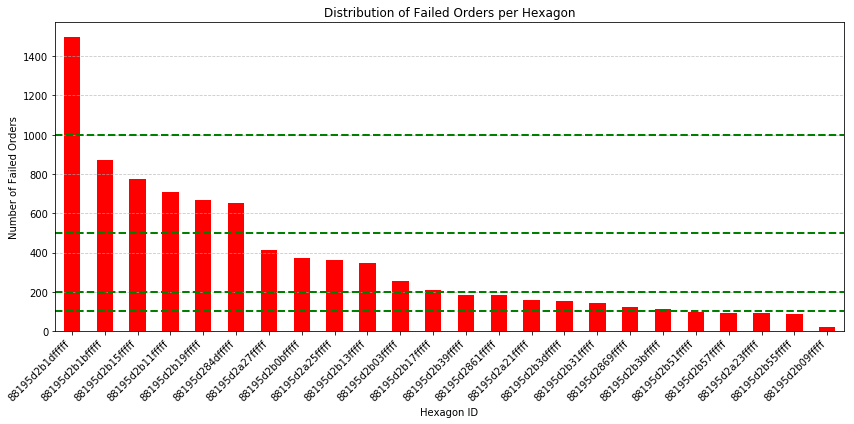

In [30]:
plt.figure(figsize=(12, 6))
hex_fail_counts.plot(kind='bar', color='red')

plt.axhline(y=1000, color='green', linestyle='--', linewidth=2)
plt.axhline(y=500, color='green', linestyle='--', linewidth=2)
plt.axhline(y=200, color='green', linestyle='--', linewidth=2)
plt.axhline(y=100, color='green', linestyle='--', linewidth=2)

plt.title('Distribution of Failed Orders per Hexagon')
plt.xlabel('Hexagon ID')
plt.ylabel('Number of Failed Orders')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The green dashed lines above classify the Hexagons

In [33]:
# Create a folium map
m = folium.Map(location=[center_la, center_lo], zoom_start=10)
legend_html = '''
     <div style="position: fixed; 
                 bottom: 50px; left: 50px; width: 120px; height: 200px; 
                 border:2px solid grey; z-index:9999; font-size:14px;
                 background-color: white;
                 ">
     <p style="margin:10px; color:black;"><b>Legend</b></p>
     <p style="margin:10px; color:black;"><i style="background: darkred">&nbsp;&nbsp;&nbsp;</i> >1000</p>
     <p style="margin:10px; color:black;"><i style="background: firebrick">&nbsp;&nbsp;&nbsp;</i> 500 - 1000</p>
     <p style="margin:10px; color:black;"><i style="background: tomato">&nbsp;&nbsp;&nbsp;</i> 200 - 500</p>
     <p style="margin:10px; color:black;"><i style="background: peachpuff">&nbsp;&nbsp;&nbsp;</i> 100 - 200</p>
     <p style="margin:10px; color:black;"><i style="background: linen">&nbsp;&nbsp;&nbsp;</i> 1 - 100</p>
      </div>
     '''

# Add legend HTML to the map
m.get_root().html.add_child(folium.Element(legend_html))


for hex_center, hex_id in zip(hex_centers, hexes_80_percent['hex_id']):
    hex_boundary = h3.h3_to_geo_boundary(hex_id)
    fail_count = hex_fail_counts.get(hex_id, 0)  # Get the count of failed orders for this hexagon
    
    if fail_count>1000:
        color='darkred'
    elif (fail_count>500)&(fail_count<=1000):
        color='firebrick'
    elif (fail_count>200)&(fail_count<=500):
        color='tomato'
    elif (fail_count>100)&(fail_count<=200):
        color='peachpuff'
    elif (fail_count>0)&(fail_count<=100):
        color=('linen')
    else:
        color='green'
    folium.Polygon(locations=hex_boundary,color='black', fill_color=color, fill_opacity=0.02).add_to(m)

display(m)